<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#C13_Models_without_Amnesia" data-toc-modified-id="C13_Models_without_Amnesia-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>C13_Models_without_Amnesia</a></span></li><li><span><a href="#MISC" data-toc-modified-id="MISC-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MISC</a></span></li></ul></div>

# C13_Models_without_Amnesia

In [1]:
library(tidyverse)
# loads experimental branch of statistical rethinking pkg
library(rethinking)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0       v purrr   0.3.0  
v tibble  2.0.1       v dplyr   0.8.0.1
v tidyr   0.8.2       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
Warning message:
"package 'tibble' was built under R version 3.5.2"Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'purrr' was built under R version 3.5.2"Warning message:
"package 'dplyr' was built under R version 3.5.2"Warning message:
"package 'stringr' was built under R version 3.5.2"Warning message:
"package 'forcats' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: rstan
Loading required package: StanHeaders
Warning message:
"package 'StanHeaders' was built under R version 3.5.2"rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution

In [2]:
# library(rethinking)
data(reedfrogs)
d <- reedfrogs

In [3]:
# make the tank cluster variable
d$tank <- 1:nrow(d) %>% as.integer()

In [4]:
d$density %>% table
str(d)

.
10 25 35 
16 16 16 

'data.frame':	48 obs. of  6 variables:
 $ density : int  10 10 10 10 10 10 10 10 10 10 ...
 $ pred    : Factor w/ 2 levels "no","pred": 1 1 1 1 1 1 1 1 2 2 ...
 $ size    : Factor w/ 2 levels "big","small": 1 1 1 1 2 2 2 2 1 1 ...
 $ surv    : int  9 10 7 10 9 9 10 9 4 9 ...
 $ propsurv: num  0.9 1 0.7 1 0.9 0.9 1 0.9 0.4 0.9 ...
 $ tank    : int  1 2 3 4 5 6 7 8 9 10 ...


In [5]:
# prior trimmed data list
dat_list <- list(
    density = d$density,
    tank = d$tank,
    surv = d$surv )

##### m12.1

In [16]:
# fit
m12.1_ <- map2stan(
    alist(
        surv ~ dbinom( density , p ) ,
        logit(p) <- a_tank[tank] ,
        a_tank[tank] ~ dnorm( 0 , 5 )
    ),
    data=d )



SAMPLING FOR MODEL '498ffc72858d00271a2d6998032ef8a7' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.515 seconds (Warm-up)
Chain 1:                0.385 seconds (Sampling)
Chain 1:       

Computing WAIC


In [49]:
# fit
m12.1_ <- map2stan(
    alist(
        surv ~ dbinom( density , p ) ,
        logit(p) <- a_tank[tank] ,
        a_tank[tank] ~ dnorm( 0 , 5 )
    ),
    data=dat_list )


SAMPLING FOR MODEL '8a12aba9f76a373cc24cbb8e54ca38c4' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.001 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 10 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.482 seconds (Warm-up)
Chain 1:                0.354 seconds (Sampling)
Chain 1:  

Computing WAIC


In [ ]:
# fit
m12.1 <- ulam(
    alist(
        surv ~ dbinom( density , p ) ,
        logit(p) <- a_tank[tank] ,
        a_tank[tank] ~ dnorm( 0 , 5 )
    ),
    data=dat_list, chains=4, log_lik=TRUE)

In [40]:
precis(m12.1_,depth=2) %>% round(2)

,mean,sd,5.5%,94.5%,n_eff,Rhat
a_tank[1],2.51,1.11,0.98,4.38,828.64,1.00
a_tank[2],5.64,2.81,2.15,10.90,830.27,1.00
a_tank[3],0.94,0.72,-0.11,2.16,1139.73,1.00
a_tank[4],5.74,2.82,2.10,10.96,989.03,1.00
a_tank[5],2.53,1.14,0.91,4.46,1210.92,1.00
a_tank[6],2.53,1.21,0.97,4.65,839.71,1.00
a_tank[7],5.79,2.87,2.03,11.13,755.38,1.00
a_tank[8],2.56,1.22,0.87,4.88,809.09,1.00
a_tank[9],-0.42,0.65,-1.51,0.57,1622.31,1.00
a_tank[10],2.46,1.16,0.81,4.40,1441.92,1.00


In [41]:
precis(m12.1,depth=2) %>% round(2)

,mean,sd,5.5%,94.5%,n_eff,Rhat
a_tank[1],2.53,1.20,0.86,4.59,2069.96,1
a_tank[2],5.70,2.71,2.20,10.66,1805.21,1
a_tank[3],0.94,0.75,-0.22,2.20,2482.15,1
a_tank[4],5.79,2.83,2.16,11.08,1617.65,1
a_tank[5],2.54,1.16,0.96,4.54,2066.37,1
a_tank[6],2.48,1.13,0.87,4.45,2120.14,1
a_tank[7],5.83,2.82,2.26,11.11,1561.59,1
a_tank[8],2.52,1.22,0.87,4.60,2250.98,1
a_tank[9],-0.45,0.68,-1.56,0.65,2201.94,1
a_tank[10],2.54,1.24,0.85,4.65,1656.59,1


##### m12.2

In [42]:
## R code 13.3
m12.2_ <- map2stan(
    alist(
        surv ~ dbinom( density , p ) ,
        logit(p) <- a_tank[tank] ,
        a_tank[tank] ~ dnorm( a , sigma ) ,
        a ~ dnorm(0,1) ,
        sigma ~ dcauchy(0,1)
    ), data=dat_list , iter=4000 , chains=4 )


SAMPLING FOR MODEL 'f63123bc23d259d1f29abcb4570e45aa' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.8 seconds (Warm-up)
Chain 1:                0.698 seconds (Sampling)
Chain 1:         

Computing WAIC


In [18]:
## R code 13.3
m12.2 <- ulam(
    alist(
        surv ~ dbinom( density , p ) ,
        logit(p) <- a_tank[tank] ,
        a_tank[tank] ~ dnorm( a , sigma ) ,
        a ~ dnorm(0,1) ,
        sigma ~ dcauchy(0,1)
    ), data=dat_list , iter=4000 , chains=4, log_lik=TRUE )


SAMPLING FOR MODEL '3dc64059df68c83e4fcd2fcce7738dd3' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1: Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1: Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1: Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1: Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1: Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1: Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1: Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1: Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1: Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1: Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1: Iteration: 4000 / 4000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.619 seconds (Warm-up)
Chain 1:                0.528 seconds (Sampling)
Chain 1:       

##### Compare

In [43]:
precis(m12.2_,depth=2) %>% round(2)

,mean,sd,5.5%,94.5%,n_eff,Rhat
a_tank[1],2.12,0.85,0.87,3.56,11789.13,1
a_tank[2],3.06,1.11,1.45,4.97,10007.95,1
a_tank[3],1.00,0.69,-0.05,2.11,14576.27,1
a_tank[4],3.03,1.09,1.47,4.90,11049.24,1
a_tank[5],2.12,0.87,0.84,3.57,12152.74,1
a_tank[6],2.13,0.88,0.81,3.60,12274.17,1
a_tank[7],3.05,1.10,1.46,4.91,11038.87,1
a_tank[8],2.12,0.87,0.83,3.62,12138.95,1
a_tank[9],-0.18,0.60,-1.14,0.78,14255.05,1
a_tank[10],2.11,0.85,0.88,3.54,11857.01,1


In [44]:
precis(m12.2,depth=2) %>% round(2)

,mean,sd,5.5%,94.5%,n_eff,Rhat
a_tank[1],2.12,0.86,0.84,3.61,12840.28,1
a_tank[2],3.04,1.08,1.48,4.94,11590.07,1
a_tank[3],0.99,0.66,-0.03,2.08,16594.75,1
a_tank[4],3.05,1.09,1.48,4.89,11755.13,1
a_tank[5],2.12,0.87,0.84,3.58,13911.84,1
a_tank[6],2.12,0.86,0.83,3.61,14666.17,1
a_tank[7],3.04,1.06,1.48,4.87,12215.19,1
a_tank[8],2.12,0.86,0.85,3.58,13857.81,1
a_tank[9],-0.18,0.61,-1.15,0.78,16932.82,1
a_tank[10],2.12,0.90,0.84,3.64,15047.65,1


In [45]:
compare(m12.1_, m12.2_) %>% round(2)

,WAIC,pWAIC,dWAIC,weight,SE,dSE
m12.2_,1009.49,37.61,0.0,1,37.91,NA
m12.1_,1023.09,49.22,13.6,0,42.82,6.64


In [46]:
compare(m12.1, m12.2) %>% round(2)

,WAIC,pWAIC,dWAIC,weight,SE,dSE
m12.2,200.92,21.28,0.00,0.52,7.37,NA
m12.1,201.09,22.49,0.17,0.48,9.28,4.4


In [30]:
compare(m12.1, m12.2,  func=LOO) %>% round(2)

Warning message:
"Some Pareto k diagnostic values are too high. See help('pareto-k-diagnostic') for details.
"Warning message in log(z):
"NaNs produced"Warning message in log(z):
"NaNs produced"Warning message:
"Some Pareto k diagnostic values are too high. See help('pareto-k-diagnostic') for details.
"Warning message in log(z):
"NaNs produced"

,LOO,pLOO,dLOO,weight,SE,dSE
m12.1,228.20,36.04,0.00,0.6,10.5,NA
m12.2,229.04,35.34,0.84,0.4,9.2,6.06


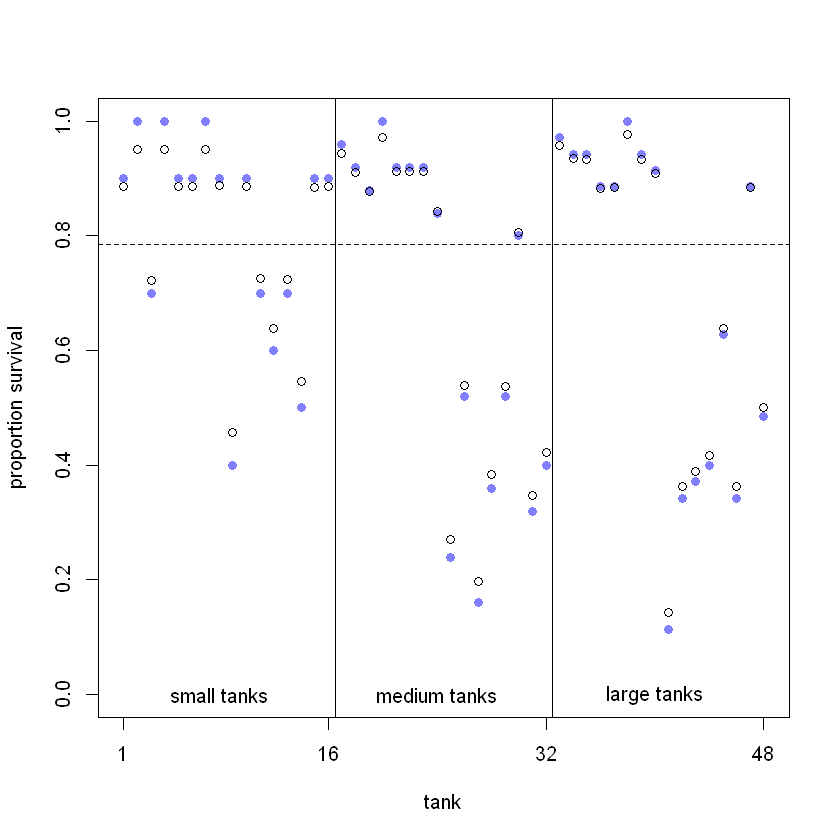

In [60]:
## R code 13.5
# extract Stan samples
post <- extract.samples(m12.2)

# compute median intercept for each tank
# also transform to probability with logistic
d$propsurv.est <- logistic( apply( post$a_tank , 2 , median ) )

# display raw proportions surviving in each tank
plot( d$propsurv , ylim=c(0,1) , pch=16 , xaxt="n" ,
    xlab="tank" , ylab="proportion survival" , col=rangi2 )
axis( 1 , at=c(1,16,32,48) , labels=c(1,16,32,48) )

# overlay posterior medians
points( d$propsurv.est )

# mark posterior median probability across tanks
abline( h=logistic(median(post$a)) , lty=2 )

# draw vertical dividers between tank densities
abline( v=16.5 , lwd=0.5 )
abline( v=32.5 , lwd=0.5 )
text( 8 , 0 , "small tanks" )
text( 16+8 , 0 , "medium tanks" )
text( 32+8 , 0 , "large tanks" )


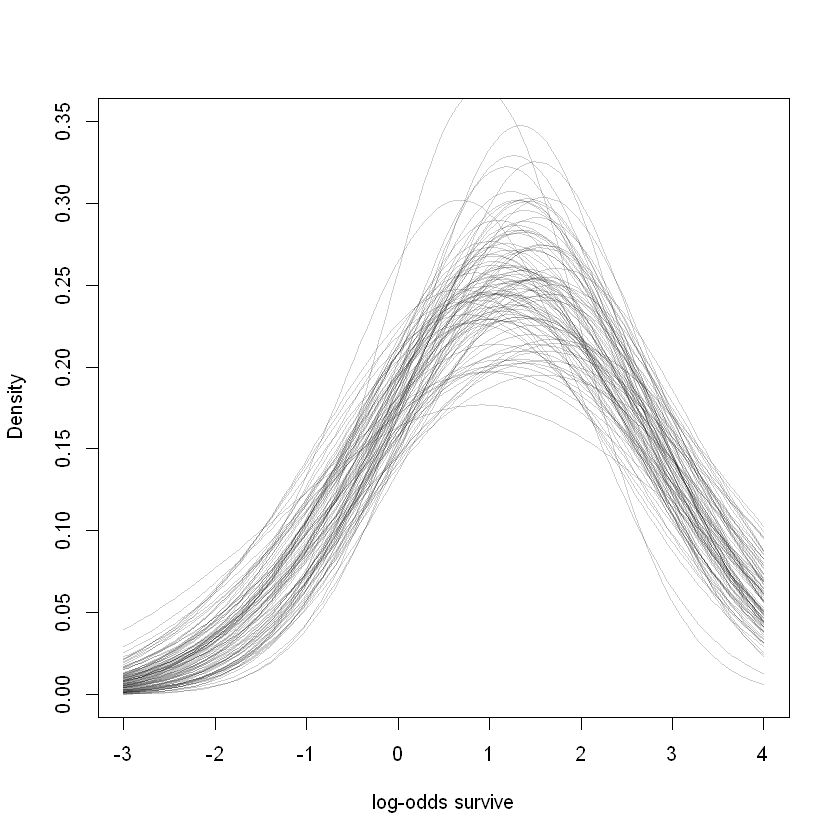

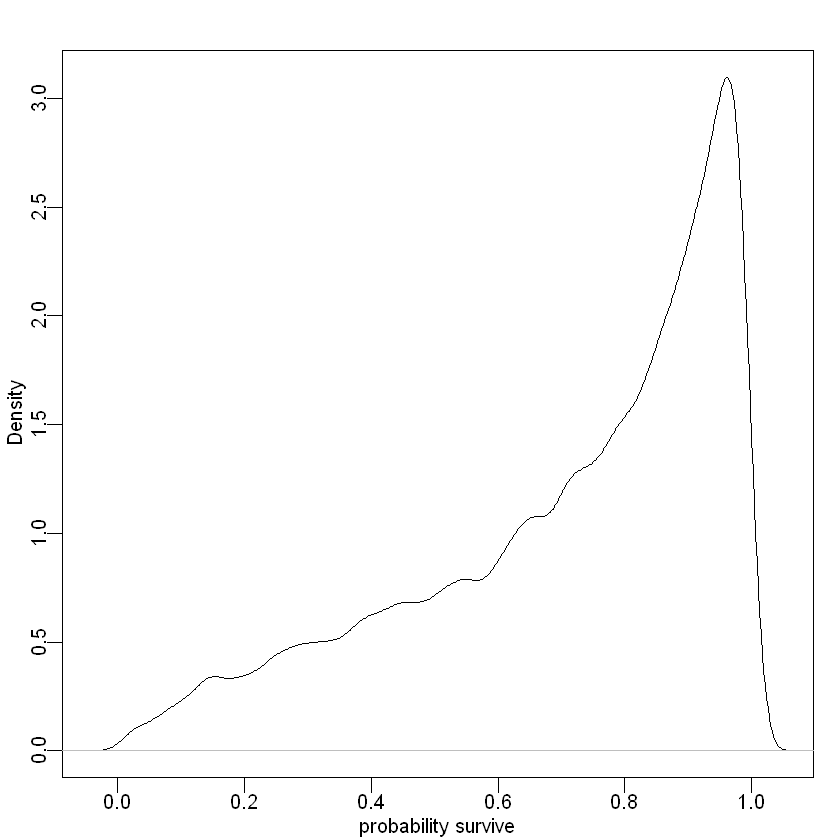

In [61]:
## R code 13.6
# show first 100 populations in the posterior
plot( NULL , xlim=c(-3,4) , ylim=c(0,0.35) ,
    xlab="log-odds survive" , ylab="Density" )

for ( i in 1:100 )
    curve( dnorm(x,post$a[i], post$sigma[i]) , add=TRUE ,
    col=col.alpha("black",0.2) )

# sample 8000 imaginary tanks from the posterior distribution
sim_tanks <- rnorm( 8000 , post$a , post$sigma )

# transform to probability and visualize
dens( logistic(sim_tanks) , xlab="probability survive" )

# MISC

##### buffer

In [73]:
exp(-300)

[1] 5.1482e-131

In [47]:
stancode(m12.1)
stancode(m12.1_)

## R code 13.5
# extract Stan samples
post <- extract.samples(m12.1)

# compute median intercept for each tank
# also transform to probability with logistic
d$propsurv.est <- logistic( apply( post$a_tank , 2 , median ) )

# display raw proportions surviving in each tank
plot( d$propsurv , ylim=c(0,1) , pch=16 , xaxt="n" ,
    xlab="tank" , ylab="proportion survival" , col=rangi2 )
axis( 1 , at=c(1,16,32,48) , labels=c(1,16,32,48) )

# overlay posterior medians
points( d$propsurv.est )

# mark posterior median probability across tanks
abline( h=logistic(median(post$a)) , lty=2 )

# draw vertical dividers between tank densities
abline( v=16.5 , lwd=0.5 )
abline( v=32.5 , lwd=0.5 )
text( 8 , 0 , "small tanks" )
text( 16+8 , 0 , "medium tanks" )
text( 32+8 , 0 , "large tanks" )


sessionInfo()

data{
    int density[48];
    int surv[48];
    int tank[48];
}
parameters{
    vector[48] a_tank;
}
model{
    vector[48] p;
    a_tank ~ normal( 0 , 5 );
    for ( i in 1:48 ) {
        p[i] = a_tank[tank[i]];
        p[i] = inv_logit(p[i]);
    }
    surv ~ binomial( density , p );
}
generated quantities{
    vector[48] log_lik;
    vector[48] p;
    for ( i in 1:48 ) {
        p[i] = a_tank[tank[i]];
        p[i] = inv_logit(p[i]);
    }
    for ( i in 1:48 ) log_lik[i] = binomial_lpmf( surv[i] | density[i] , p[i] );
}

